In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

# data8 = pd.read_csv('output_8bit.csv', header=None)
# data32 = pd.read_csv('output_32bit.csv', header=None)


In [ ]:
# data
def norm(y):
    y = sorted(y[1].values)
    y = y / sum(y)
    return np.cumsum(y)

y8  = norm(data8)
y32 = norm(data32)

# ploting
plt.plot(y8, label='8 bit symbol')
# plt.plot(y32, label='32 bit symbol')
plt.xlabel('Unique symbols')
plt.ylabel('Cumulative sum of probability')
# plt.yscale('log')
plt.legend()

In [ ]:
'''CODES'''

In [54]:
bit = 32
# data = pd.read_csv(f'codes_{bit}bit.csv', header=None)
# data = pd.read_csv(f'minvar_codes_{bit}bit.csv', header=None)
data = pd.read_csv(f'ext_codes_{bit}bit.csv', header=None)

In [55]:
val = data[1].values
data

,0,1
0,b'\xed\r>;\xa9\x13P<',00000000000000000
1,b'\xfeew\xbc\xf4\xfd\xd4\xbb',00000000000000001
2,b';p\xce;\xf4\xfd\xd4;',0000000000000001
3,b'\xac\x8b\xdb\xbb\x0eO/\xbc',0000000000000010
4,b'\xe7\x1d\xa7;\xac\x8b[<',00000000000000110
...,...,...
1003719,b'\xe0-\x90\xbao\x12\x03\xbb',1111111111111110
1003720,b'\x1e\xa7\xe8;HP\xfc\xbb',111111111111111100
1003721,b'\xc3d*<.\x90 <',111111111111111101
1003722,b';pN<RI\x1d:',111111111111111110


In [56]:
avg_codeword = np.mean(
    [len(str(c)) for c in val])
avg_codeword

22.76844331708717

Text(0, 0.5, 'Codeword length')

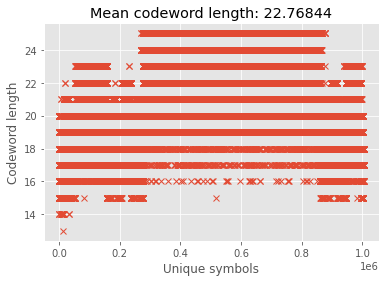

In [57]:
# data
def norm(y):
    y = y[1].values
    y = [len(str(c)) for c in y]
    return y

# y8  = norm(data8)
# y32 = norm(data32)

y = norm(data)

# ploting
plt.plot(y, 'x', label=f'{bit} bit codeword len')
# plt.plot(y32, 'x', label='32 bit codeword len')
plt.title('Mean codeword length: {:.5f}'.format(avg_codeword))
plt.xlabel('Unique symbols')
plt.ylabel('Codeword length')
# plt.yscale('log')
# plt.legend(loc='lower right')

In [58]:
bit = 8
d1= pd.read_csv(f'codes_{bit}bit.csv', header=None)
d2= pd.read_csv(f'minvar_codes_{bit}bit.csv', header=None)
d3= pd.read_csv(f'ext_codes_{bit}bit.csv', header=None)
bit = 32
d4= pd.read_csv(f'codes_{bit}bit.csv', header=None)
d5= pd.read_csv(f'minvar_codes_{bit}bit.csv', header=None)
d6= pd.read_csv(f'ext_codes_{bit}bit.csv', header=None)

In [66]:
data = [d1,d2,d3,d4,d5,d6]
dd = [d[1].values for d in data]
data = dd

In [67]:
dd = []
for D in data:
    dd += [[len(str(d)) for d in D]]

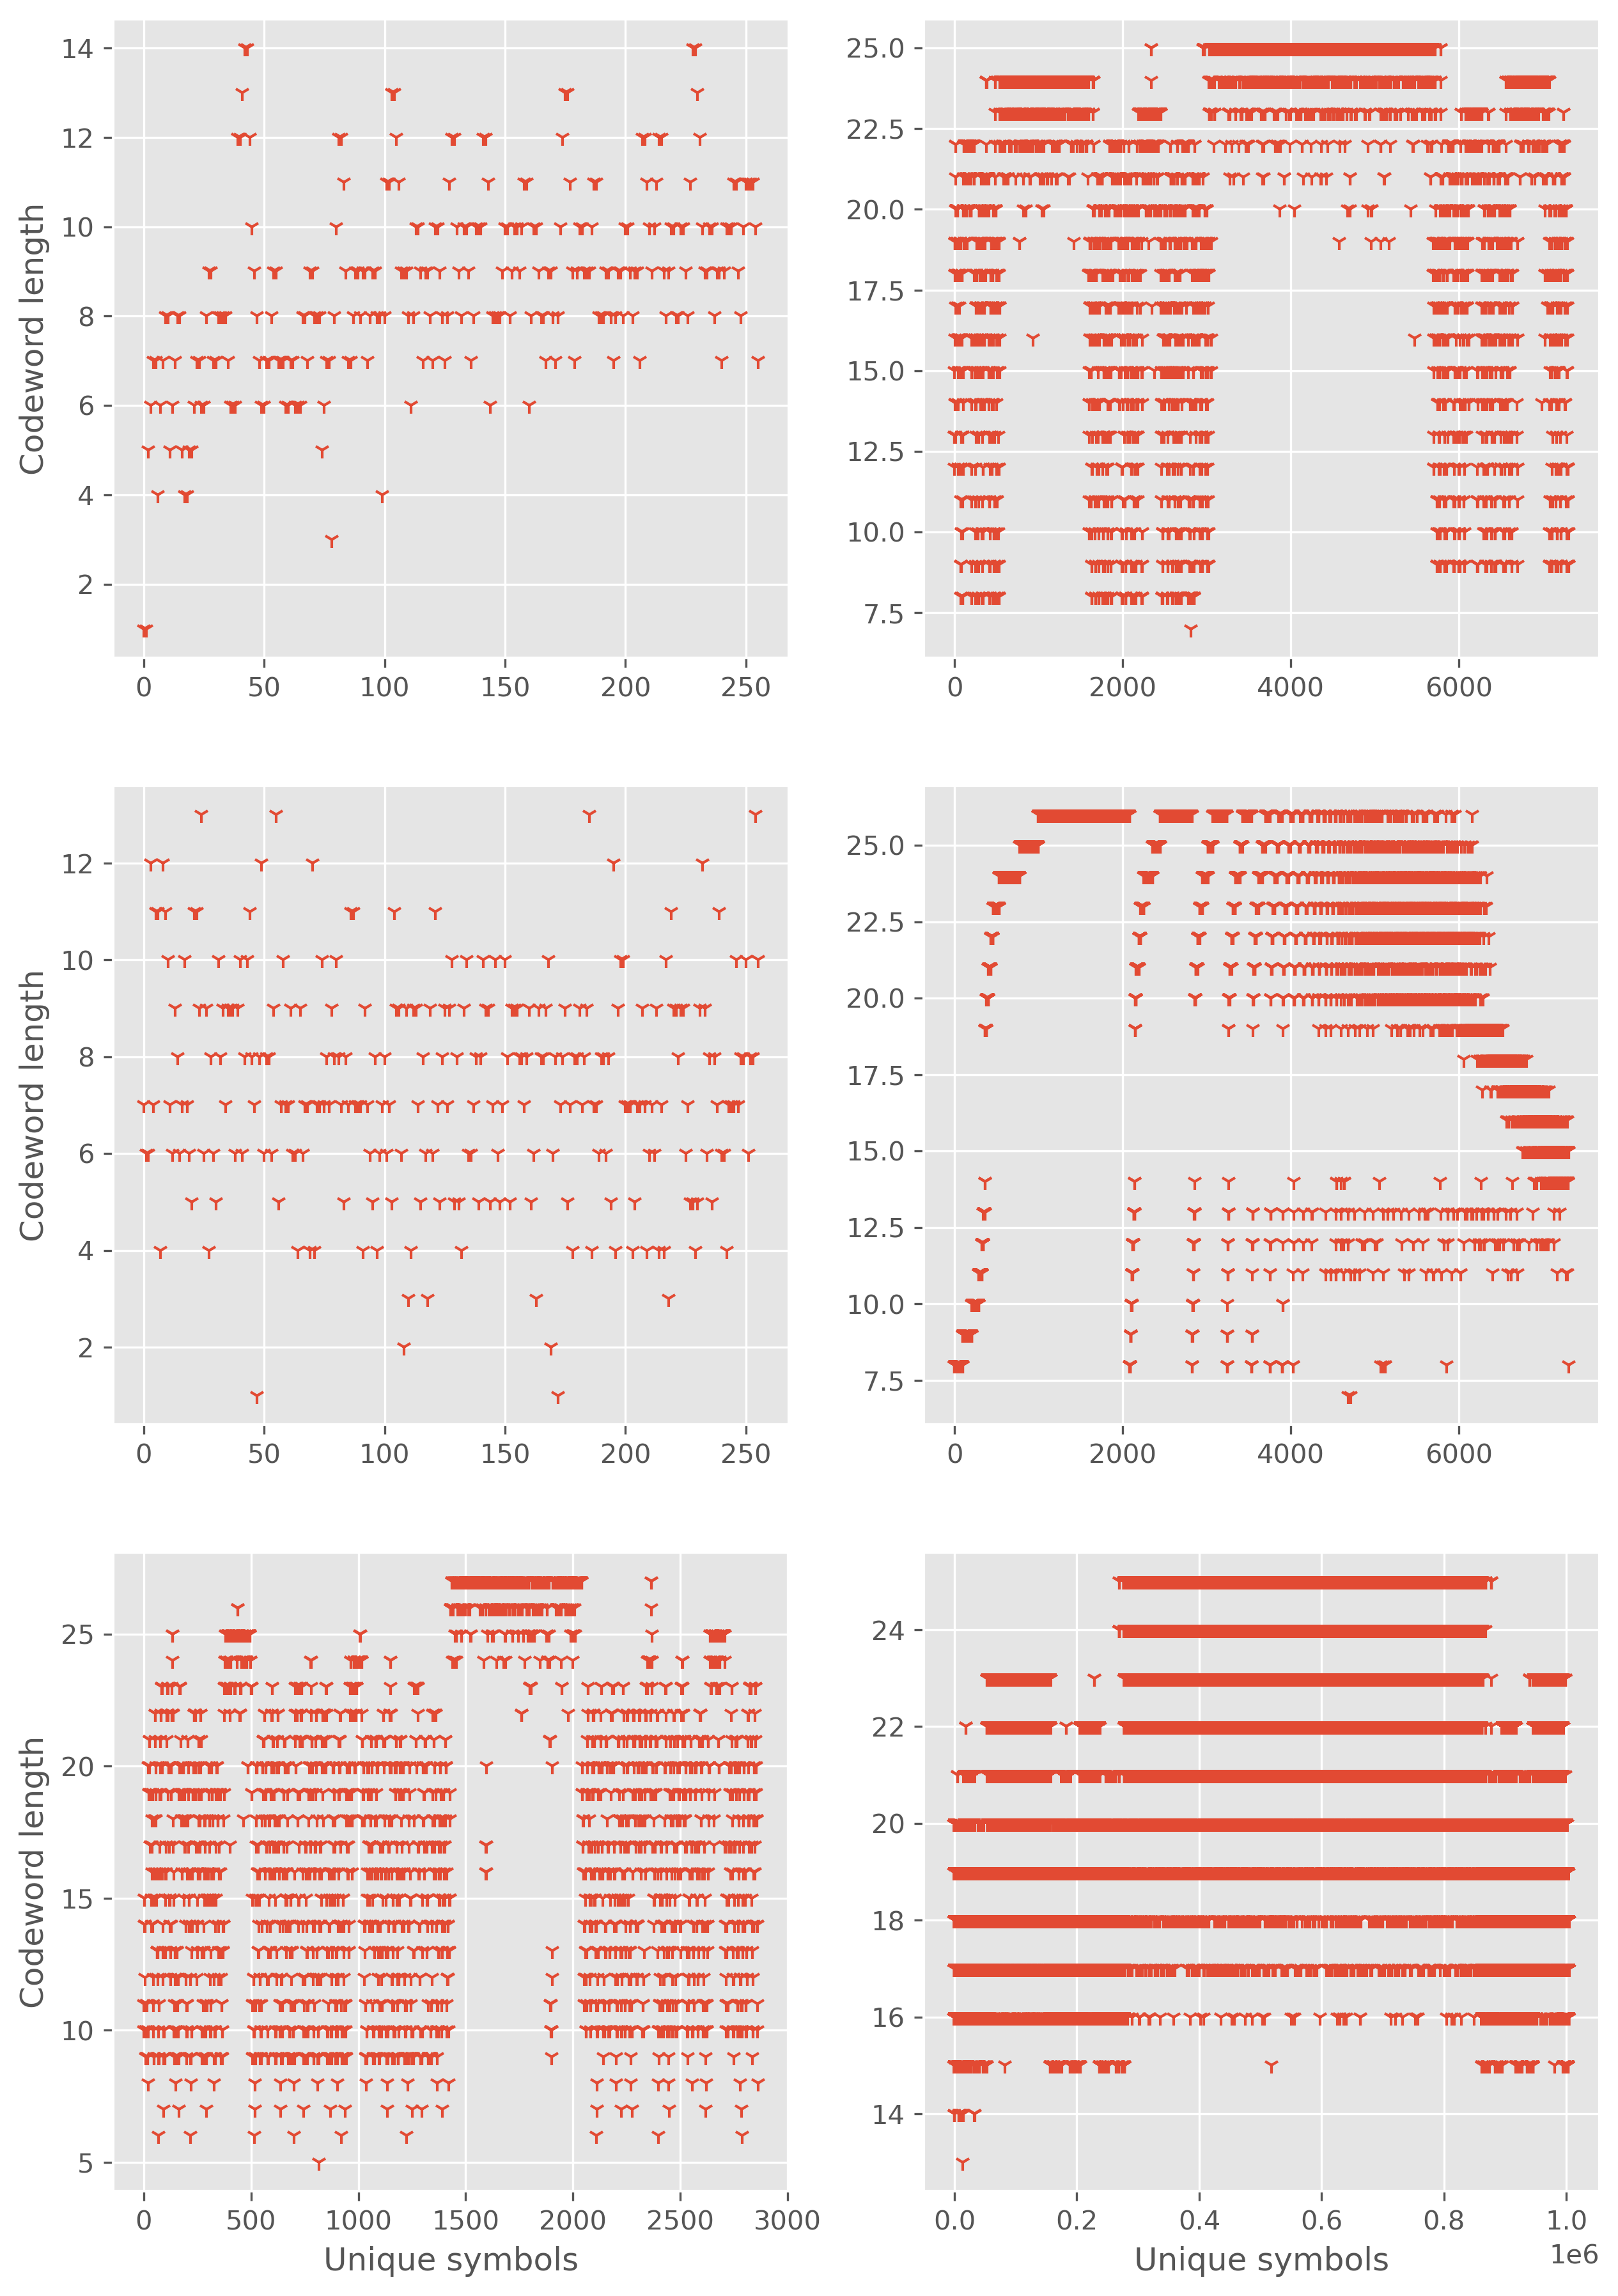

In [105]:
fig, ax = plt.subplots(3,2, figsize=(2*5,3*5), dpi=300)
names = ['']
k = 0
for i in range(2):
    for j in range(3):
        ax[j,i].plot(dd[k], '1')
        k += 1

        if i == 0:
            ax[j,i].set_ylabel('Codeword length')
        if j == 2:
            ax[j,i].set_xlabel('Unique symbols')
            
    

In [115]:
import os
sizes = {}
sizes['Original'] = os.stat(filepath).st_size
names = ['Min-Var. (8)', 'Pure Huffman (8)', 'Extend. (8)',
         'Min-Var. (32)', 'Pure Huffman (32)', 'Extend. (32)']

basedir = './results'

k = 0
for subdir in ['8byte', '32byte']:
    for version in ['min_variance', 'original', 'extended']:
            prefix = os.path.join(subdir, version)
            path = os.path.join(basedir,prefix,'alexnet_1.bin')
            
#             key = prefix.split('/')[0][:-4] +'_'+ prefix.split('/')[1][:-4]
            sizes[names[k]] = os.stat(path).st_size
            k+=1
sizes

{'Original': 244409199,
 'Min-Var. (8)': 280954480,
 'Pure Huffman (8)': 213493374,
 'Extend. (8)': 131224414,
 'Min-Var. (32)': 114239748,
 'Pure Huffman (32)': 68101153,
 'Extend. (32)': 3068032}

In [168]:
A = np.array(list(sizes_.values())) / 1e+6
for a in A:
    print('{:.3f}'.format(a))

0.000
0.004
0.284
0.004
0.280
0.076
51.451


In [125]:
import os
prefix = ['minvar_', '', 'ext_']
codes = ['_8bit', '_32bit']
sizes_ = {}
sizes_['Original'] = 0
for p in prefix:
    for c in codes:
        fn = p+'codes'+c+'.csv'
        
        sizes_[fn] = os.stat(fn).st_size

In [133]:
table_size = list(sizes_.values()) / original_file_size

In [139]:
bottom

(array([1.        , 1.14952498, 0.87350793, 0.53690456, 0.46741182,
        0.2786358 , 0.01255285]),
 array([0.00000000e+00, 1.54004023e-05, 1.16056188e-03, 1.53881278e-05,
        1.14729724e-03, 3.12062722e-04, 2.10513042e-01]))

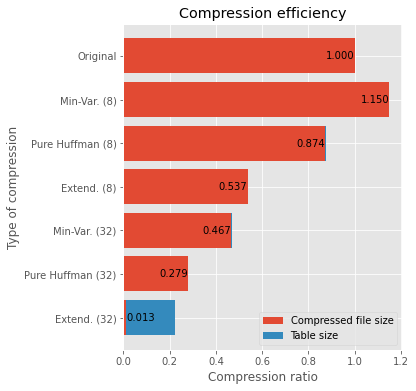

In [147]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

compress = np.array(list(sizes.values()))
method_name = np.array(list(sizes.keys()))
original_file_size = compress[0]
compress = compress / compress[0]
y_pos = np.arange(len(compress))

fig, ax = plt.subplots(figsize=(5,6))
bars = ax.barh(y_pos, compress, align='center', label='Compressed file size')
bottom = compress

ax.set_yticks(y_pos)
ax.set_yticklabels(method_name)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('Compression ratio')
ax.set_ylabel('Type of compression')
ax.set_title('Compression efficiency')

for bar in bars:
#     print(bar.get_height(), bar.get_width(), bar.get_y(), bar.get_x())
    width = bar.get_width()
    label_y_pos = bar.get_y() + bar.get_height() / 2
    if width > 0.1:
        ax.text(width, label_y_pos, s='{:.3f}'.format(width), ha='right',
        va='center')
    else:
        ax.text(width, label_y_pos, s='{:.3f}'.format(width), ha='left',
        va='center')
bars = ax.barh(y_pos, table_size, align='center', left=bottom, label='Table size')
plt.legend()

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
filepath = 'alexnet_1.pth'
# filepath = 'sample.txt'

In [174]:
f = open(filepath, 'rb')
data = f.read()
f.close()

In [411]:
from tqdm import tqdm
mb = 30
step = int(mb * 1e+6)
N = os.stat(filepath).st_size

F = []

for k,i in (enumerate(range(step, N, step))):
    print(step*k, step*(k+1))
    part = data[step*k:step*(k+1)]
    frq = {}
    for c in part:
        if not c in frq: frq[c] = 1
        frq[c] += 1
    F.append(frq)

0 30000000
30000000 60000000
60000000 90000000
90000000 120000000
120000000 150000000
150000000 180000000
180000000 210000000
210000000 240000000


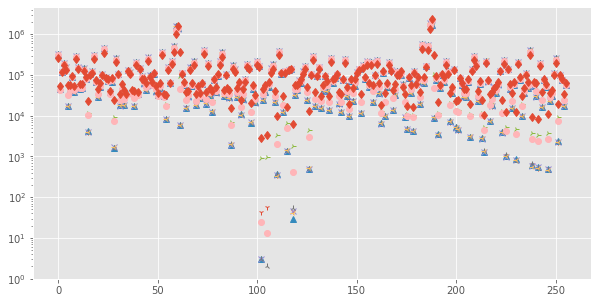

In [412]:
mrk = ['1', '^', 'x', '2', '3', '4', 'o', 'd', '*']
plt.figure(figsize=(10,5))
for i, f in enumerate(F):
    plt.plot(f.keys(), f.values(), mrk[i], alpha=1)
plt.yscale('log')

In [413]:
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, v_measure_score

In [414]:
result_kl = np.zeros((len(F), len(F)))
result_mse = np.zeros((len(F), len(F)))

for i in range(len(F)):
    for j in range(len(F)):
        total1 = {k:0 for k in range(256)}
        total2 = {k:0 for k in range(256)}

        for k,val in F[i].items(): 
            total1[k] = val
        for k,val in F[j].items(): 
            total2[k] = val
        
        t1 = np.array(list(total1.values())) #/ step
        t2 = np.array(list(total2.values())) #/ step

        result_kl[i,j] = adjusted_mutual_info_score(t1, t2)
        result_mse[i,j] = ((t1 - t2)**2).sum() // step
        

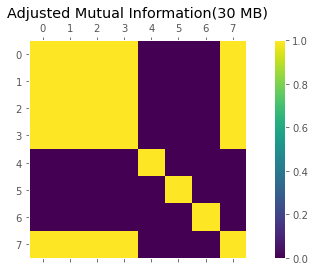

In [416]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
ax.set_title('Adjusted Mutual Information(30 MB)')
b = ax.matshow(result_kl)
ax.grid('')
plt.colorbar(b)
plt.show()